In [1]:
# importando as bibliotecas

import numpy as np
import sympy as sym
import control as ct
import matplotlib.pyplot as plt
from scipy.signal import lsim
plt.style.use('_mpl-gallery')

In [2]:
m = 1
M = 5
L = 2
g = -10
d = 1 

s = -1

A = np.array([[0,1,0,0],[0,-d/M,-m*g/M,0],[0,0,0,1],
              [0,-s*d/(M*L), -s*(m+M)*g/(M*L),0]])
B = np.array([[0],[1/M],[0],[s*1/(M*L)]])
C = np.array([1,0,0,0])
D = 0

In [9]:
# Sistema aumentado com pertubações e ruidos

Vd = 0.01*np.eye(4) # covariância de pertubação
Vn = 1 # covariância de ruido


In [10]:
#Entradas aumentadas com pertubação e ruido
Bf = np.hstack((B, Vd, np.zeros_like(B))) 

# Cria um grande sistema em espaço de estados com uma entrada simples
sysC = ct.ss(A, Bf, C, np.array([0,0,0,0,0, Vn]))

# Sistema com todas as saidas de estado, pertubações e sem ruido
SysFullOutput = ct.ss(A,Bf, np.eye(4),np.zeros([4,np.size(Bf,1)]))

In [11]:
# Criando um Filtro de Kalman

# Design do Filtro
[L,P,E] = ct.lqe(A,Vd,C,Vd,Vn)

# Alternativamente, possivel construir usando "ct.lqr"
Kf,_,_= ct.lqr(np.transpose(A),np.transpose([C]),Vd,Vn)
K_lqr=np.transpose([Kf[0]])

# Estimador Filtro de Kalman
sysKF = ct.ss(A - L * C,np.hstack((B,L)), np.eye(4),0 )



In [17]:
L

array([[ 6.29000113e-03],
       [ 1.92820571e-05],
       [-5.51046581e-06],
       [-1.28461650e-06]])

In [12]:
# Sistema linearizado estimado na posiçao "caida" 
dt = 0.01
t = np.arange(0,50,dt)

uDIST = np.random.randn(4, len(t))
uNOISE = np.random.randn(len(t))

u = np.zeros_like(t)

# Atribuindo valores ao array u
u[99:120] = 100  # Impulso positivo
u[1499:1520] = -100  # Impulso negativo

uAUG = np.vstack((u,Vd @ Vd @ uDIST,uNOISE))



In [13]:

t,y = ct.forced_response(sysC,t,uAUG)
u_entrada = np.vstack((u, np.transpose(y[0])))

t,xtrue = ct.forced_response(SysFullOutput,t,uAUG)

t,x = ct.forced_response(sysKF,t,u_entrada)


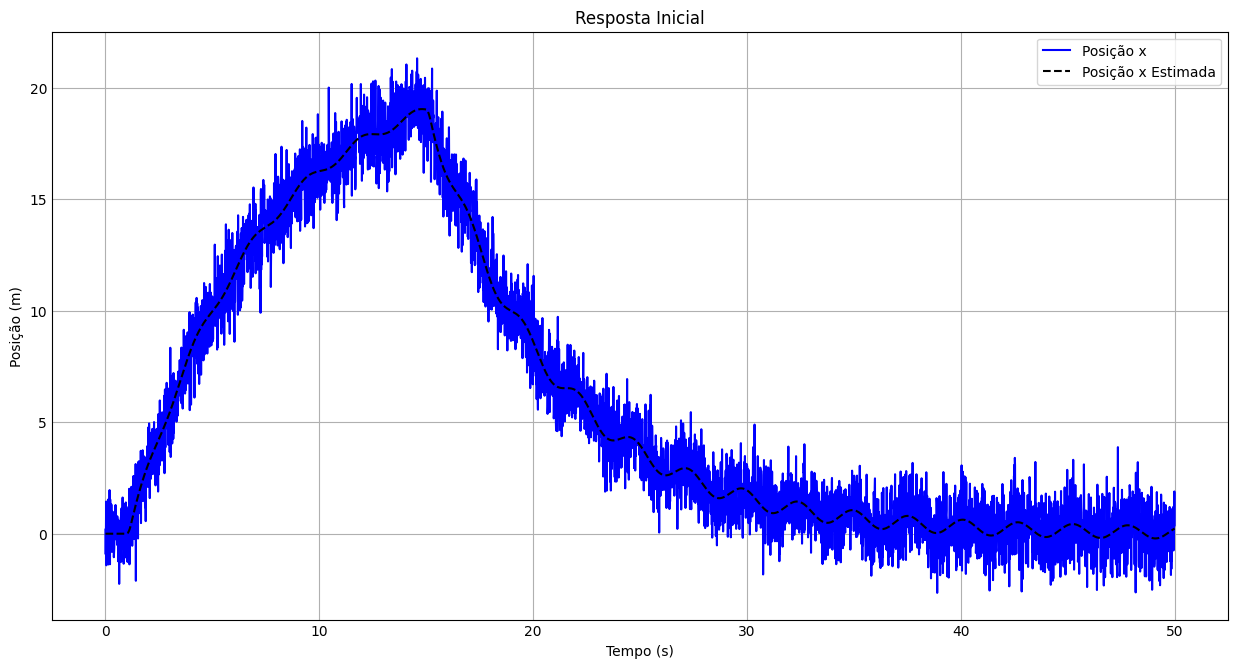

In [14]:
subplots = plt.subplots(1, 1, figsize=(12, 6))
subplots[1].plot(t,y[0],'b', label='Posição x')
#subplots[1].plot(t,xtrue[0],'-r', label='Posição x verdadeira')
subplots[1].plot(t,x[0],'--k', label='Posição x Estimada')
subplots[1].set_title('Resposta Inicial')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()

plt.show()

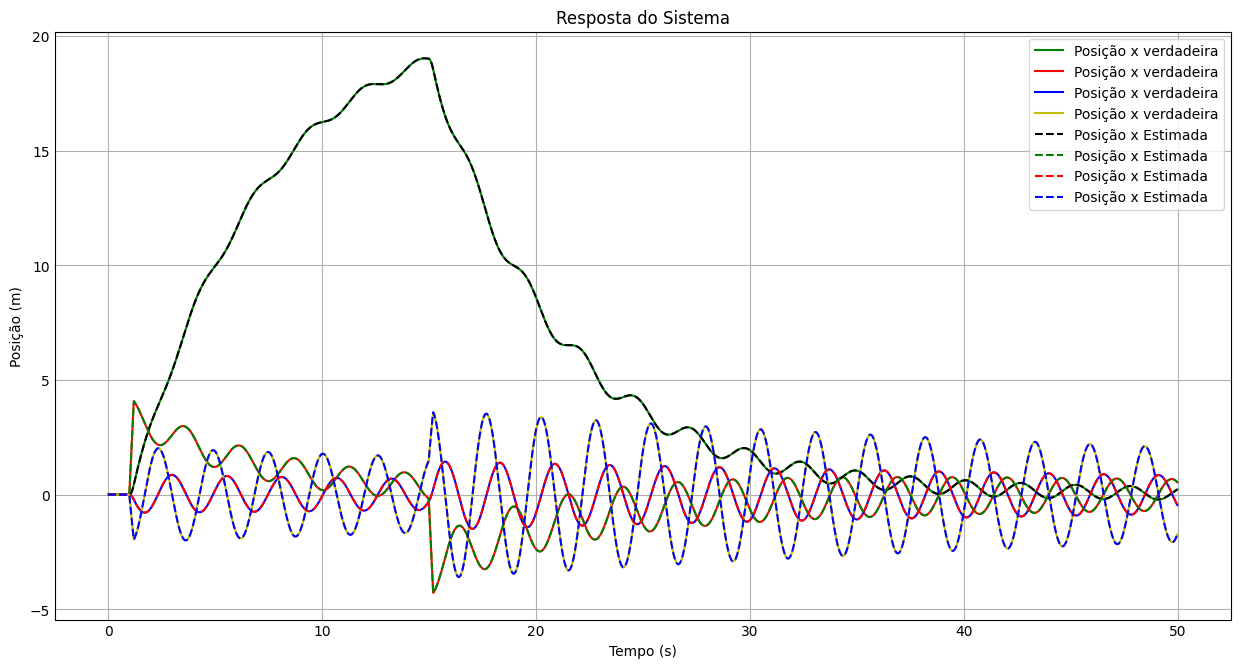

In [15]:
subplots = plt.subplots(1, 1, figsize=(12, 6))
subplots[1].plot(t,xtrue[0],'-g', label='Posição x verdadeira')
subplots[1].plot(t,xtrue[1],'-r', label='Posição x verdadeira')
subplots[1].plot(t,xtrue[2],'-b', label='Posição x verdadeira')
subplots[1].plot(t,xtrue[3],'-y', label='Posição x verdadeira')
subplots[1].plot(t,x[0],'--k', label='Posição x Estimada')
subplots[1].plot(t,x[1],'--g', label='Posição x Estimada')
subplots[1].plot(t,x[2],'--r', label='Posição x Estimada')
subplots[1].plot(t,x[3],'--b', label='Posição x Estimada')
subplots[1].set_title('Resposta do Sistema')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()

plt.show()

# LQG 


In [158]:
# Matrizes de peso LQR

Q = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
R = np.array([0.0001])
K,_,_= ct.lqr(A,B,Q,R)

In [174]:
K


array([[ 100.        ,  125.03327349, -234.16930127,    9.8117513 ]])

In [183]:
# Sistema aumentado com pertubações e ruídos
sysKF2 = ct.ss(A - K_lqr * C,np.hstack((B,K_lqr)), np.eye(4),0 )
degrau = np.ones_like(t)

t, y_kf, = ct.initial_response(sysKF2,t) 

In [184]:
sysKF2

StateSpace(array([[-0.82044279,  1.        ,  0.        ,  0.        ],
       [-0.28656319, -0.2       ,  2.        ,  0.        ],
       [ 0.2280543 ,  0.        ,  0.        ,  1.        ],
       [ 0.25748812,  0.1       , -6.        ,  0.        ]]), array([[ 0.        ,  0.82044279],
       [ 0.2       ,  0.28656319],
       [ 0.        , -0.2280543 ],
       [-0.1       , -0.25748812]]), array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]))

In [185]:
y_kf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

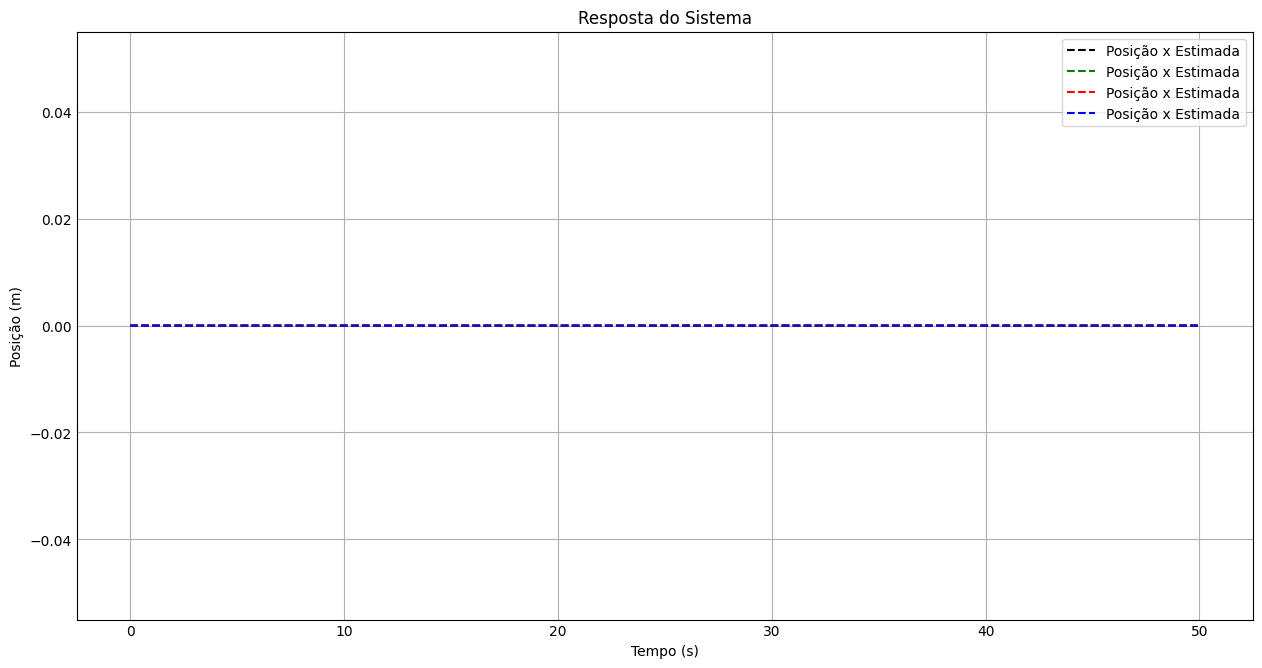

In [187]:
subplots = plt.subplots(1, 1, figsize=(12, 6))
subplots[1].plot(t,y_kf[0],'--k', label='Posição x Estimada')
subplots[1].plot(t,y_kf[1],'--g', label='Posição x Estimada')
subplots[1].plot(t,y_kf[2],'--r', label='Posição x Estimada')
subplots[1].plot(t,y_kf[3],'--b', label='Posição x Estimada')
subplots[1].set_title('Resposta do Sistema')
subplots[1].set_xlabel('Tempo (s)')
subplots[1].set_ylabel('Posição (m)')
subplots[1].grid(True)
subplots[1].legend()